In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Read the Image

In [2]:
image = cv2.imread("mono.png")  

Save the Image

In [3]:
cv2.imwrite("saved_mono.png", image)  

True

In [4]:
# Read the saved image
saved_image = cv2.imread("saved_mono.png")

In [5]:
# Convert the image from BGR to RGB
saved_image_rgb = cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB)

Plot the Image

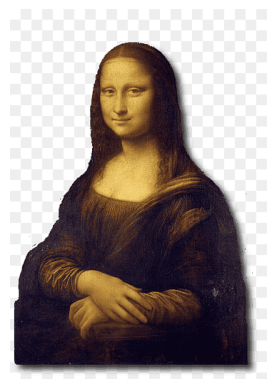

In [6]:
# Display the image using Matplotlib
plt.imshow(saved_image_rgb)
plt.axis('off') 
plt.show()

Numpy for Images  

1 - Manipulating Pixels

In [7]:
# Convert the image to a NumPy array
image_array = np.array(saved_image_rgb)

# Display the array shape
print("Image shape:", image_array.shape)

Image shape: (519, 360, 3)


In [8]:
white_pixels = np.where((image_array == [230, 230, 230]).all(axis=2))
image_array[white_pixels] = [255, 255, 255]

non_white_pixels = np.where((image_array != [255, 255, 255]).all(axis=2))
image_array[non_white_pixels] = [0, 0, 0]


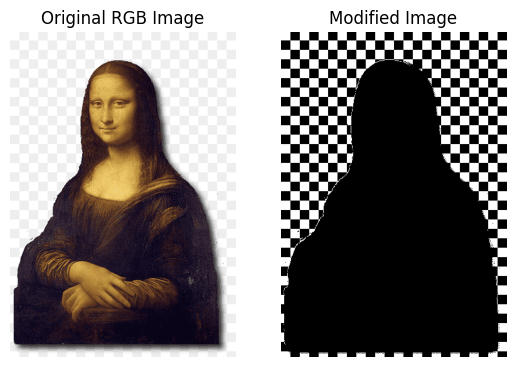

In [9]:
modified_image = cv2.convertScaleAbs(image_array)

plt.subplot(1, 2, 1)
plt.imshow(saved_image_rgb)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(modified_image)
plt.title('Modified Image')
plt.axis('off')

plt.show()

2 - Color Space Conversion

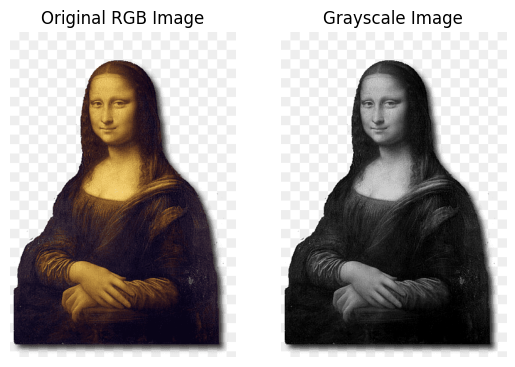

In [10]:
gray_image = np.dot(saved_image_rgb[..., :3], [0.2989, 0.5870, 0.1140])

plt.subplot(1, 2, 1)
plt.imshow(saved_image_rgb)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()


Image Channels and Plot

In [11]:
blue_channel = saved_image[:, :, 0]
green_channel = saved_image[:, :, 1]
red_channel = saved_image[:, :, 2]


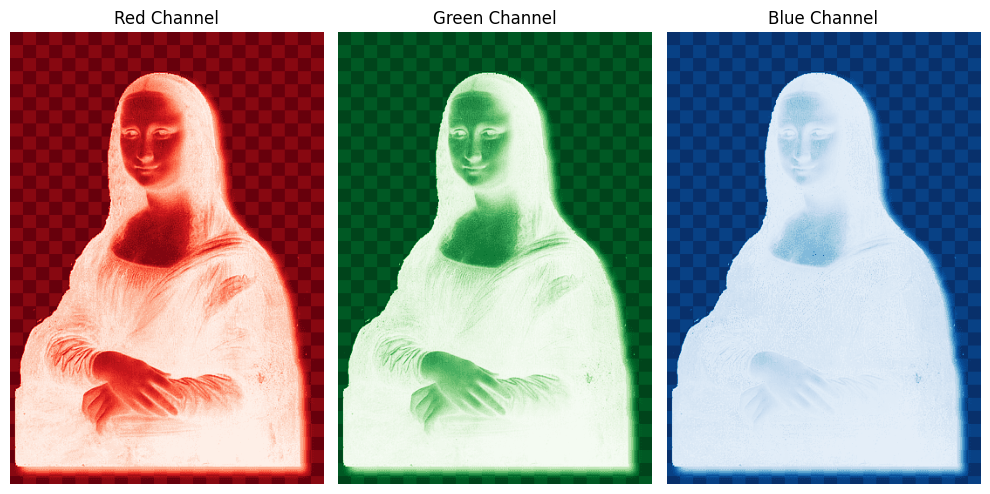

In [12]:
plt.figure(figsize=(10, 6))

plt.subplot(131)
plt.imshow(red_channel, cmap='Reds', vmin=0, vmax=255)  
plt.title('Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(green_channel, cmap='Greens', vmin=0, vmax=255)
plt.title('Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(blue_channel, cmap='Blues', vmin=0, vmax=255)
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()


Arithmetic Operations

Add

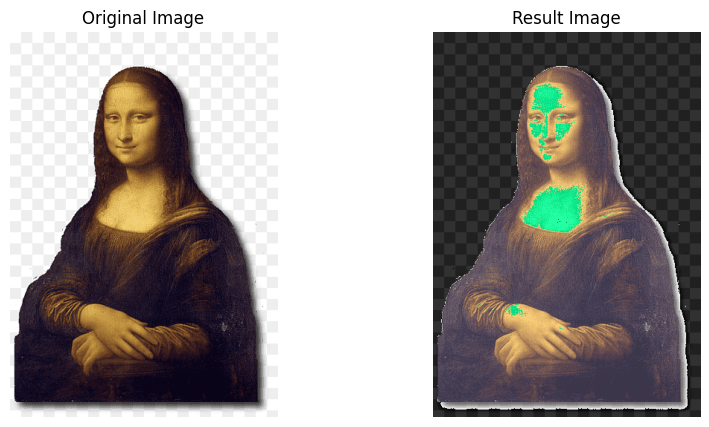

In [13]:
constant_value = 50
result_image = np.clip(saved_image + constant_value, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.axis('off')

plt.show()

Subtract

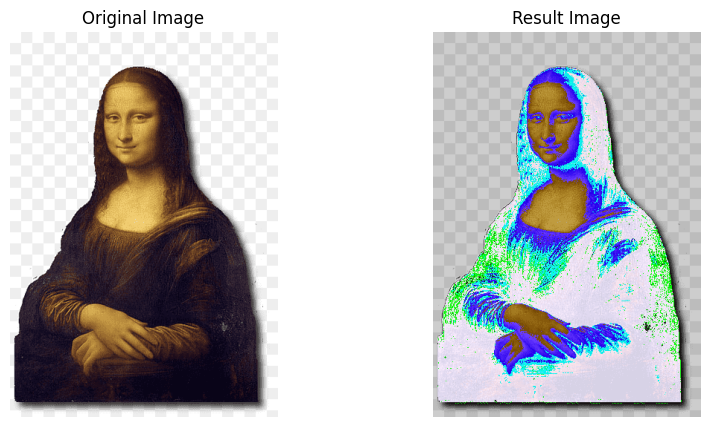

In [14]:
result_image = np.clip(saved_image - constant_value, 0, 255).astype(np.uint8) 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.axis('off')

plt.show()

Multiply By a Constant

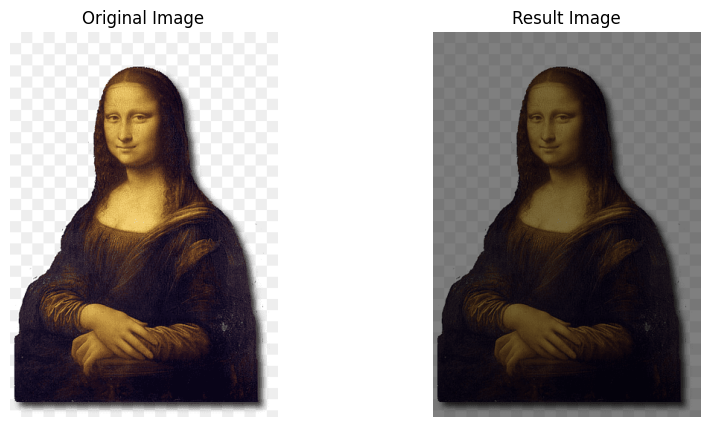

In [15]:
scalar = 2
result_image = np.clip(saved_image / scalar, 0, 255).astype(np.uint8) 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.axis('off')

plt.show()

Multiply

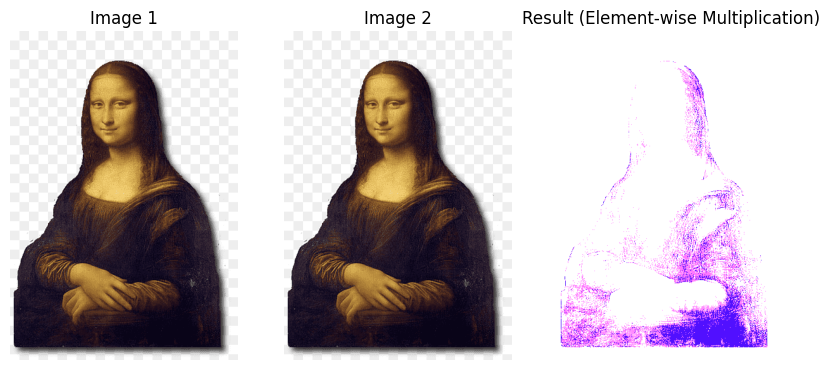

In [16]:
# Perform element-wise multiplication
result_image = cv2.multiply(saved_image, saved_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(saved_image, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result (Element-wise Multiplication)')
plt.axis('off')

plt.show()

Image Histogram with Numpy and Plot

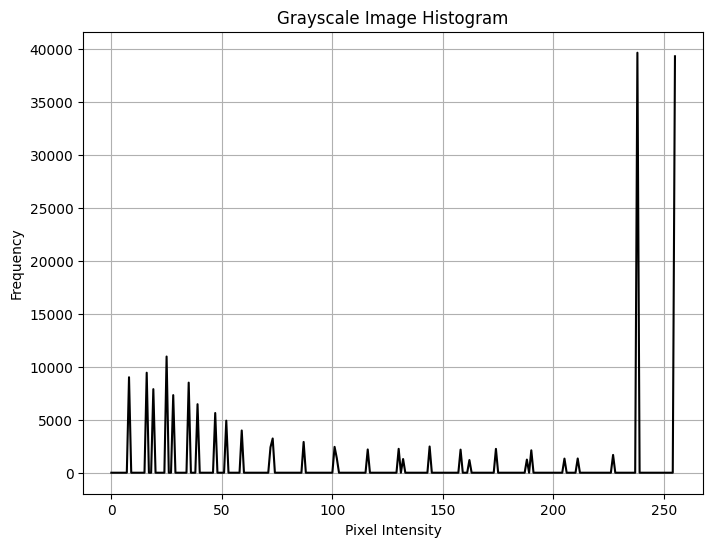

In [17]:
gray_image = cv2.cvtColor(saved_image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram using numpy
histogram, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

plt.figure(figsize=(8, 6))
plt.plot(histogram, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Grayscale Image Histogram')
plt.grid(True)
plt.show()